# Анализ и прогнозирование сердечных приступов

***

## **Описание данных**

<p> Анализируя исторические данные о медицинских исследованиях определить находится ли человек в группе риска сердечного приступа.
</p>

Таблица heart: <br />
- *Age* : Возраст пациента
- *Sex* : Пол пациента
- *exang* : Стенокардия, вызванная физической нагрузкой
- *ca* : Количество крупных сердечных сосудов
- *cp* : Тип боли в груди
  - Значение 1 : Типичная стенокардия
  - Значение 2 : Нетипичная стенокардия
  - Значение 3 : Неангинальная боль
  - Значение 4 : Бессимптомная
- *trtbps* : Артериальное давление в состоянии покоя в мм рт. ст.
- *chol* : холестерол (мг/дл) получен через датчик ИМТ
- *fbs* : Уровень сахара в крови натощак
- *rest_ecg* : Результат ЭКГ в состоянии покоя
  - Значение 0 : Норма
  - Значение 1 : Аномалии ST-T волны (инверсия Т-волны и/или подъем или депрессия ST > 0.05 mV
  - Значение 2 : Зафиксирована вероятная либо определена гипертрофия левого желудочка по критерию Эстеса
- *thalach* : максимальная частота сердечных сокращений
- *output* :
  - 0 : Меньший шанс сердечного приступа
  - 1 : Больший шанс серечного приступа

###**1. Подготовка данных**

Импортируем необходимые библиотеки

In [64]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим данные из источника и посмотрмс общую информацию

In [65]:
#!wget https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/download?datasetVersionNumber=2

In [154]:
#for local
import zipfile
with zipfile.ZipFile("/Users/Misha/Documents/Python/storage/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/Users/Misha/Documents/Python/storage")

In [155]:
#for colab version
#df = pd.read_csv('/content/heart.csv')
#for local
df = pd.read_csv("/Users/Misha/Documents/Python/storage/heart.csv")

In [68]:
#оценим количество имеющихся данных
df.shape

(303, 14)

In [69]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Видим, что в исходном описании отсутствуют колонки *oldpeak*, *slp*, *thal*

Убедимся в отсутствии пропусков

In [71]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Оценим сбалансированность целевых классов выборки

In [72]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

Проверим данные на дубликаты и исключим их из анализа

In [73]:
df.duplicated().sum()

1

In [74]:
df = df.drop_duplicates()

###**2. Первичный анализ данных**

Построим графики зависимостей различных признаков для визуальной оценки данных

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

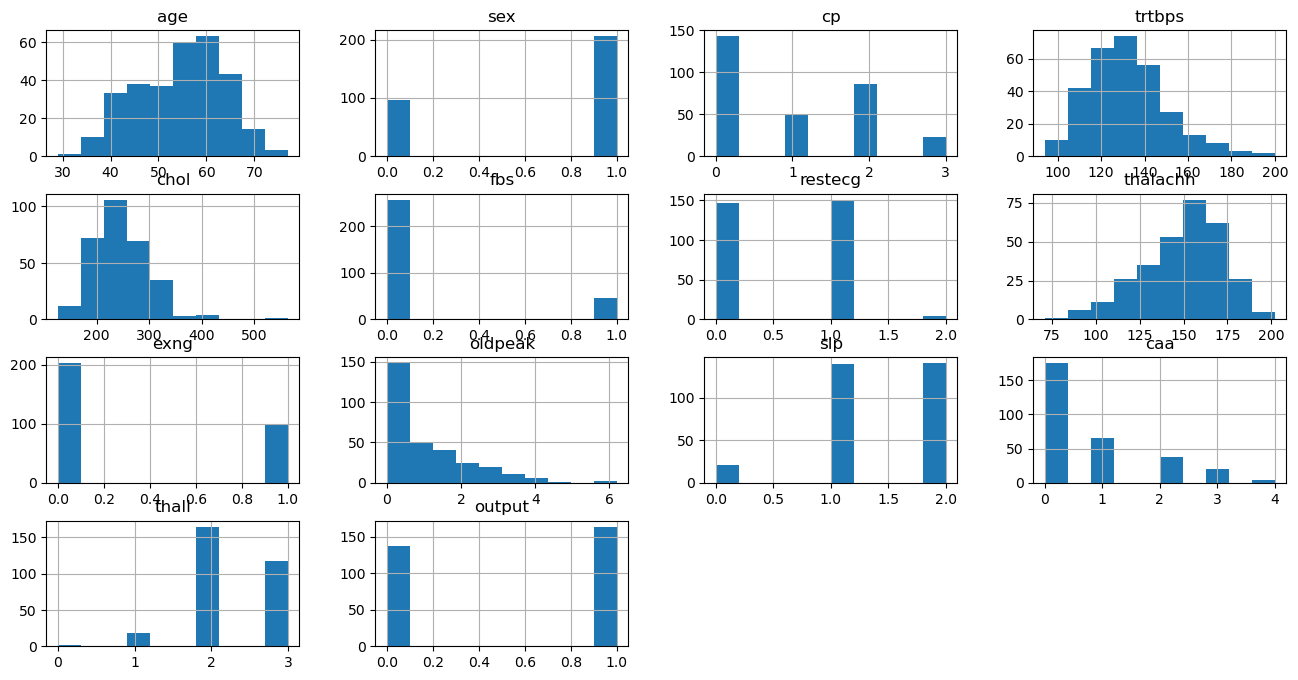

In [75]:
df.hist(figsize = (16,8))

- Количество данных сдвинуто в сторону пола "1", поэтому результат не будет настолько показательным в общем случае
- Выброс в уровне холестирина со значением >500 необходимо дополнительно исследовать
- Проявляется дисбаланс классов по многим категорийным признакам.

Отобразим статистики и оценим "реалистичность" данных и корректность их сбора

In [76]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Изучим колонки с наибольшим стандарнтым отклонением:
- Артериальное давление действительно может колебаться в пределах, представленных в выборке
- Уровень холестерола при значении свыше 300 - выраженная гиперхолестиринемия, внимательнее посмотрим на данные выше этого значения
- Количество сердечных сокращений также находится в "разумных" пределах

In [77]:
df.loc[df["chol"] > 300]
df.sort_values(by = "chol").tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


Видим, что действительно обнаруженный на гистограмме ранее скачок в уровне холестерина, сильно отличен от следующего по величине значения, однако такой уровень является возможным.

Оценим средние значения по некоторым параметрам в каждом из целевых классов

In [78]:
df.pivot_table(df[:13],["output"], aggfunc = 'mean')

,age,caa,chol,cp,exng,fbs,oldpeak,restecg,sex,slp,thalachh,thall,trtbps
output,,,,,,,,,,,,,
0,56.601449,1.166667,251.086957,0.478261,0.550725,0.159420,1.585507,0.449275,0.826087,1.166667,139.101449,2.543478,134.398551
1,52.585366,0.341463,242.640244,1.371951,0.140244,0.140244,0.586585,0.591463,0.560976,1.591463,158.378049,2.121951,129.250000


Отсюда можем заметить наиболее явные закономерности:
- Количество крупных сосудов заметно ниже у людей в зоне риска сердечного приступа
- Тип боли в груди является классовым признаком и сложно интерпретируем
- Люди в зоне риска сердечного приступа более склонны к стенокардии, вызванной физической нагрузкой
- Значение oldpeak не описано автором данных, однако людей вне зоны риска сердечного приступа имеют более высокие значения
- Люди пола с кодировкой 1 чаще в зоне риска сердечного приступа

Построим графики нахождения в зоне риска в зависимости от многокатегориальных признаков: Тип боли в груди и результат ЭКГ

Text(0.5, 0, 'Тип боли в груди')

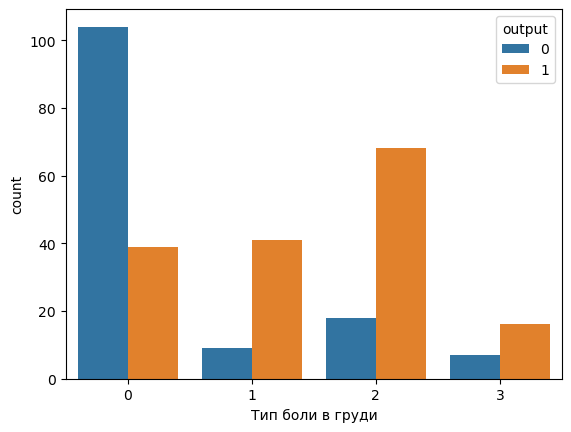

In [79]:
c = sns.countplot(x="cp", data=df, hue = "output")
c.set_xlabel("Тип боли в груди")

Обращаем внимание, что те, кто обращается с 0 типом боли в груди как правило находятся вне зоны риска. Таким образом можно сделать предварительный вывод, что любой тип боли в груди отличный от 0 является весомым признаком.

Text(0.5, 0, 'Результат ЭКГ')

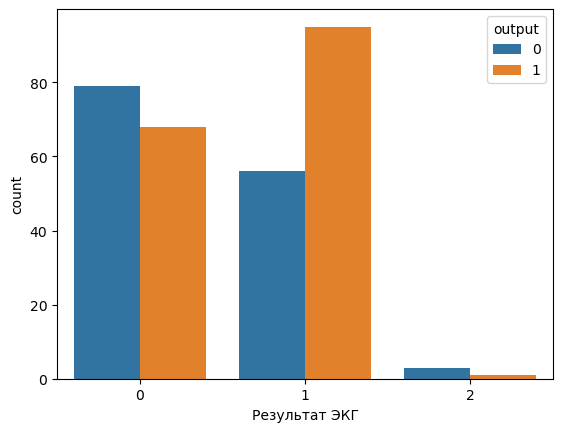

In [80]:
re = sns.countplot(x="restecg", data=df, hue = "output")
re.set_xlabel("Результат ЭКГ")

Результаты ЭКГ в некоторой степени показательны для классификации при обнаружении аномалии ST-T волны

Также построим график для неописанных параметров "slp" и "thall"

Text(0.5, 0, 'slp')

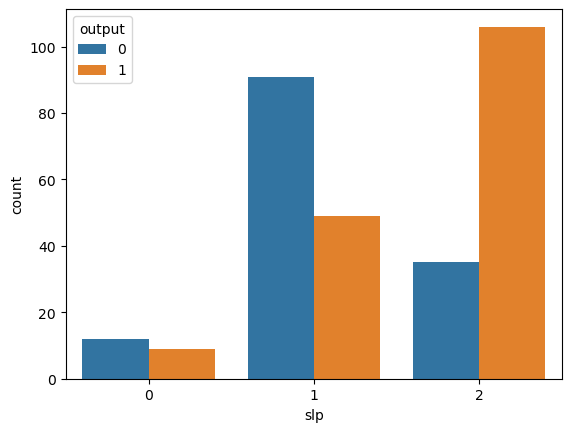

In [81]:
s = sns.countplot(x="slp", data=df, hue = "output")
s.set_xlabel("slp")

Text(0.5, 0, 'thall')

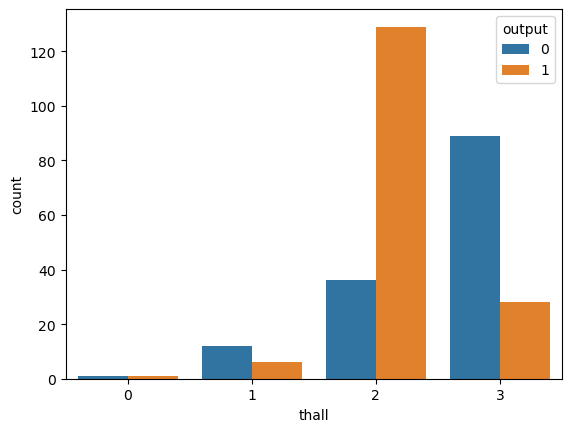

In [82]:
t = sns.countplot(x="thall", data=df, hue = "output")
t.set_xlabel("thall")

Обнаруживаем, что несмотря на незначительное отличие в средних значениях целевые категории значительно отличаются в зависимости от класса. При этом численные значения категории являются помехой для определения зависимости.

Большинство категориальных данных закодировано label-encoder, поэтому для дальнейшего изучения, а также для построения моделей исходные данные примем как закодированные. One-hot encoding произведем при построении моделей.

<Axes: >

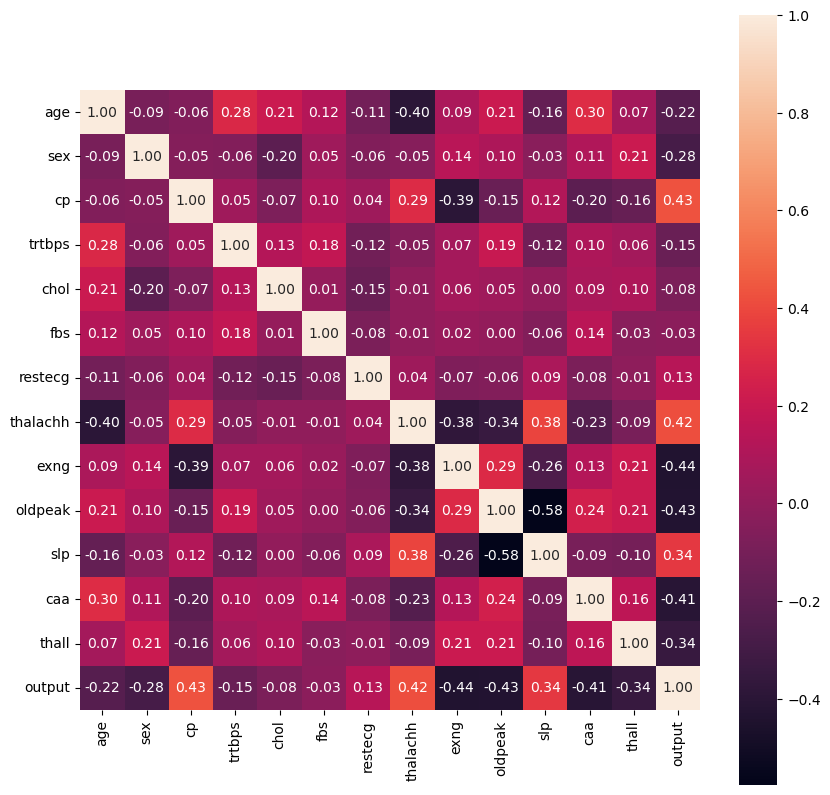

In [83]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), fmt=".2f", annot = True, square = True)

Целевая категория имеет корреляцию с рядом признаков, однако стоит обратить внимание, что некоторые признаки также коррелируют между собой, что стоит учесть при обучении моделей.

/Users/Misha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


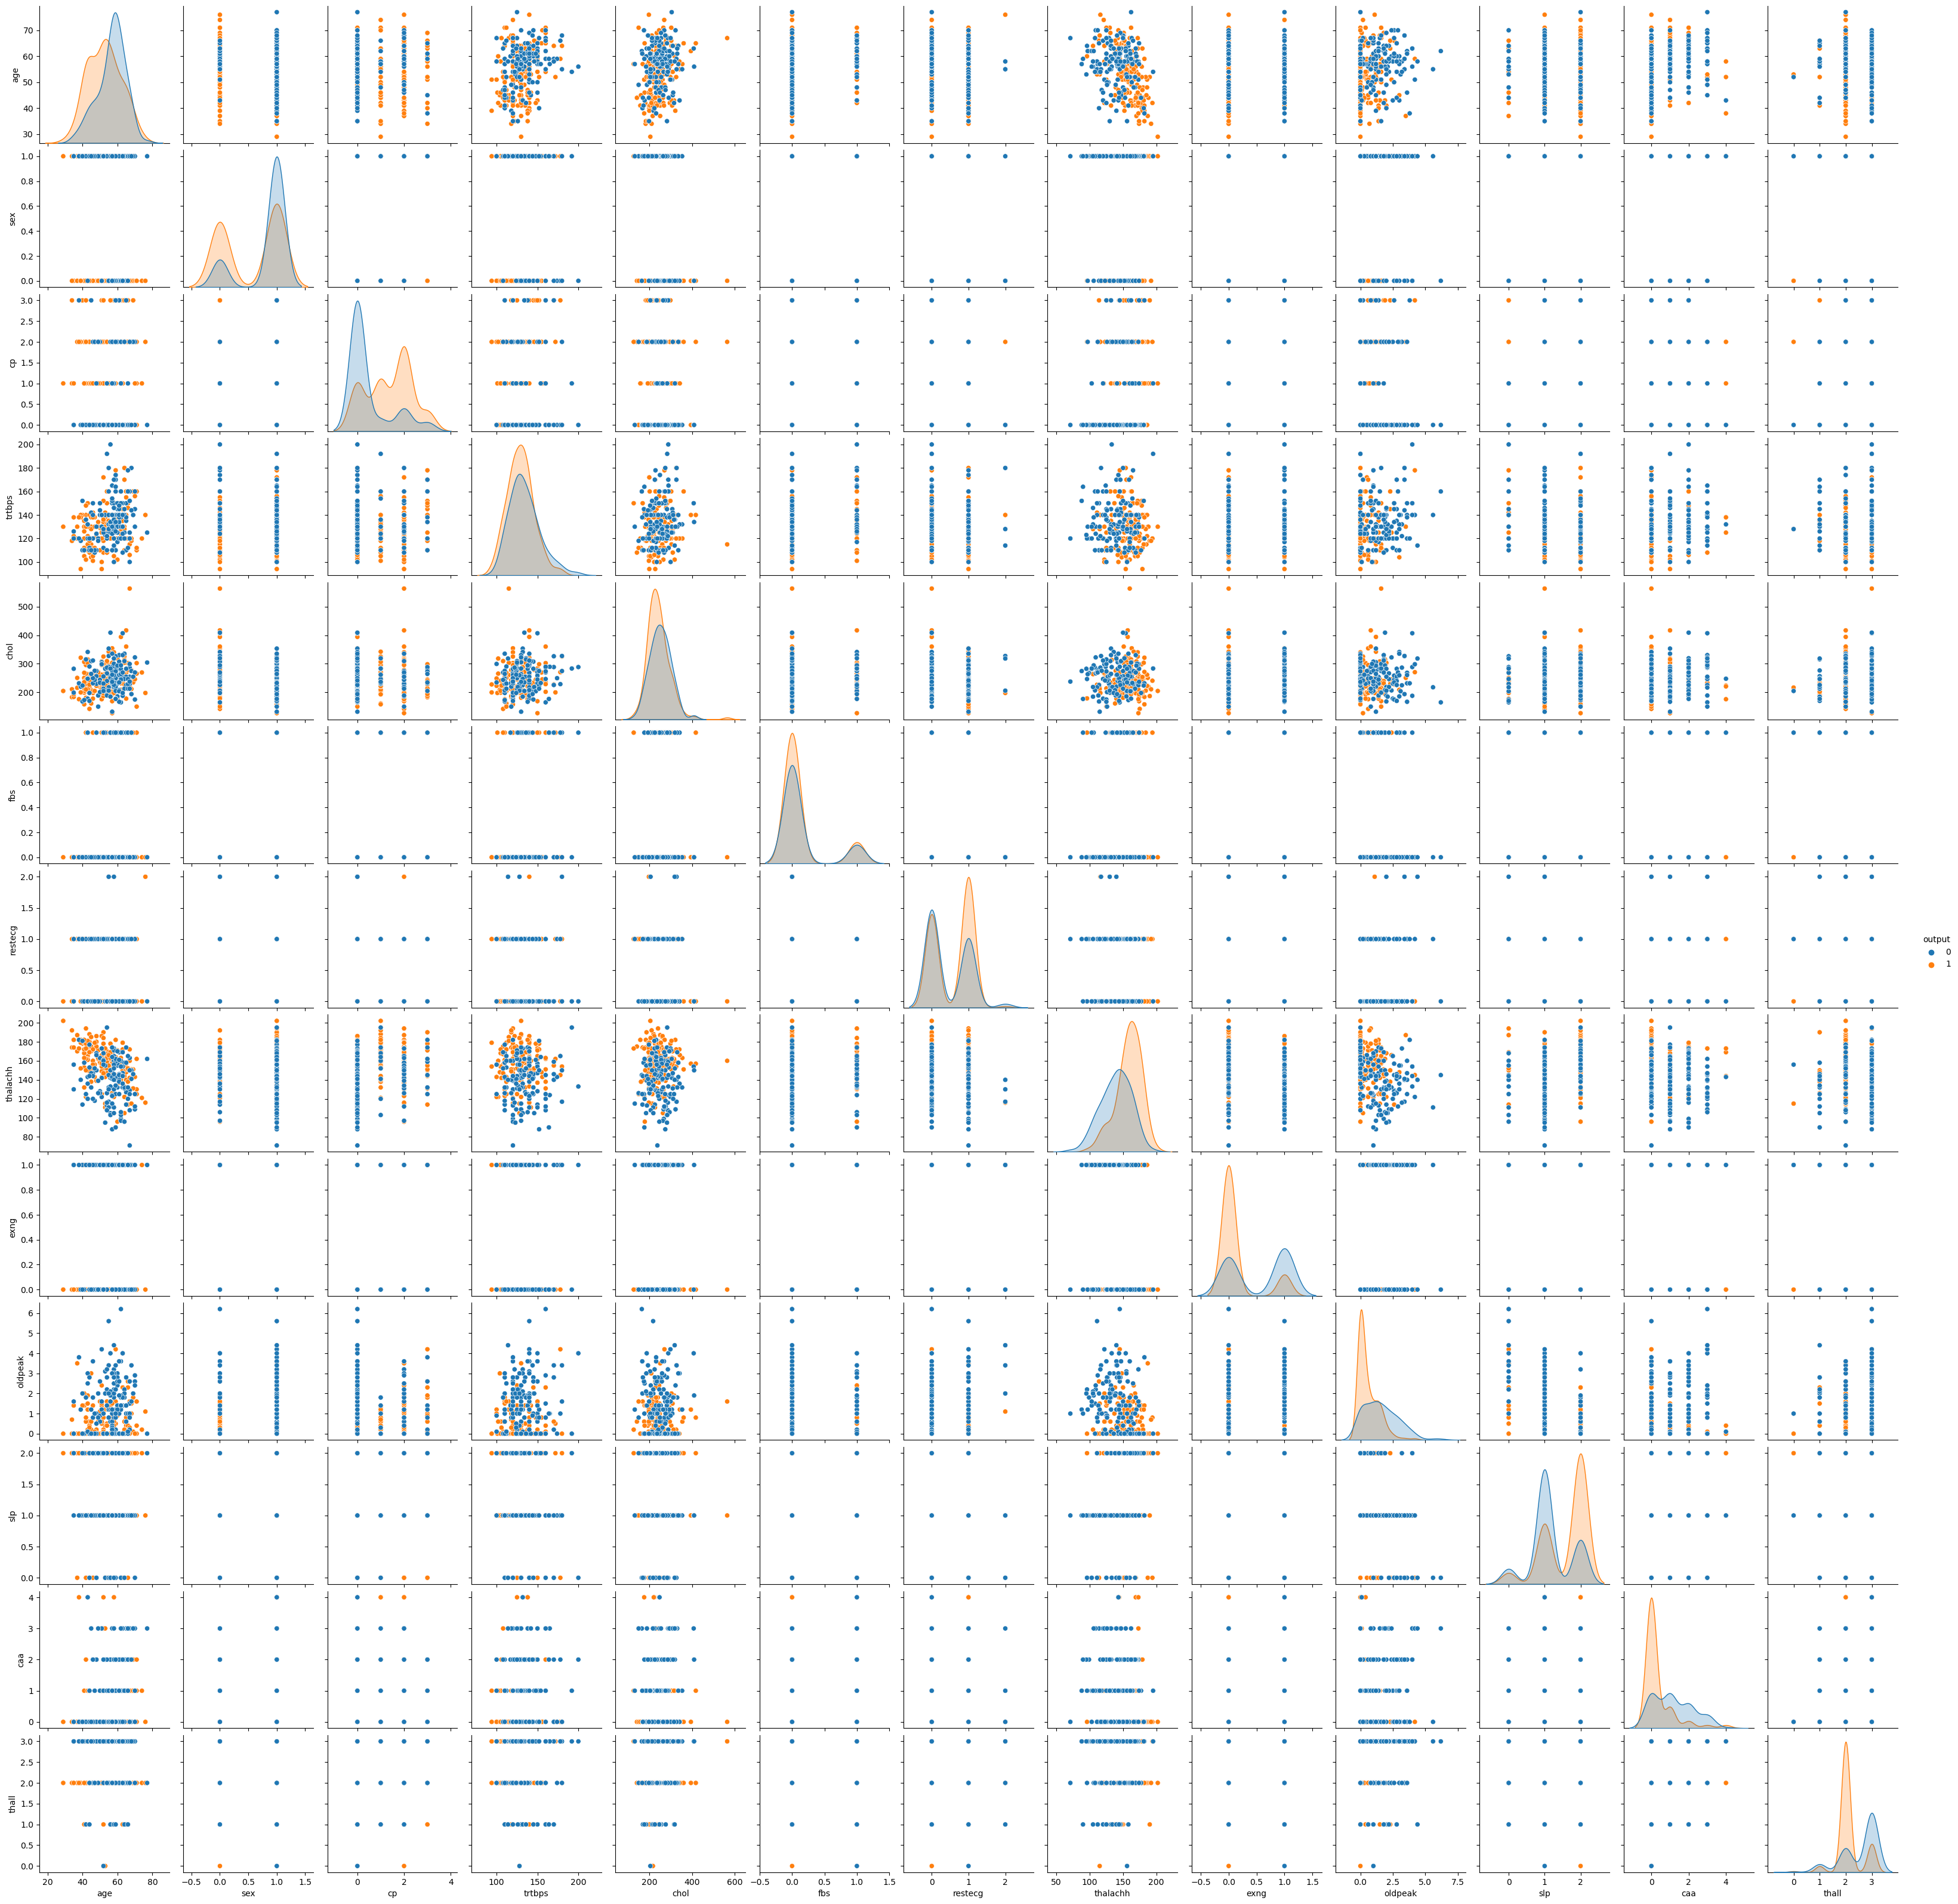

In [84]:
#lags a bit but still usable for visual representation
sns.pairplot(df, hue = "output")

По построенным графикам можно сделать предварительный вывод, что для некоторых критериев будет недостаточно линейных классификаторов для обеспечения достаточного качества, однако на этапе создания моделей данная гипотеза будет исследована подробнее.

###**3. Анализ данных**

Так как наши данные уже закодированы по label encoding, создадим копию датасета с one-hot и *возможно* target encoding.

In [85]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [86]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [87]:
transformer = make_column_transformer((OneHotEncoder(),["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]), remainder = 'passthrough')
transformed = transformer.fit_transform(df)
df_enc_ohe = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())

In [88]:
df_enc_ohe.head(3)

,onehotencoder__sex_0,onehotencoder__sex_1,onehotencoder__cp_0,onehotencoder__cp_1,onehotencoder__cp_2,onehotencoder__cp_3,onehotencoder__fbs_0,onehotencoder__fbs_1,onehotencoder__restecg_0,onehotencoder__restecg_1,...,onehotencoder__thall_0,onehotencoder__thall_1,onehotencoder__thall_2,onehotencoder__thall_3,remainder__age,remainder__trtbps,remainder__chol,remainder__thalachh,remainder__oldpeak,remainder__output
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,37.0,130.0,250.0,187.0,3.5,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,41.0,130.0,204.0,172.0,1.4,1.0


Также сравним с методом, предлагаемым библиотекой Pandas

In [89]:
df_enc_pd = pd.get_dummies(df, columns = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"])

In [90]:
df_enc_pd.head(3)

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False


In [91]:
(df_enc_pd - df_enc_ohe).sum()

age        0.0
caa_0        0
caa_1        0
caa_2        0
caa_3        0
          ... 
thall_0      0
thall_1      0
thall_2      0
thall_3      0
trtbps     0.0
Length: 62, dtype: object

Итоговые датасеты в кодировке идентичны, но встроенный метод Pandas сразу же выдает столбцы с короткими названиями, поэтому будем использовать его

In [92]:
df_enc = df_enc_pd

Импортируем необходимые классификационные модели для дальнейшего анализа данных.

In [93]:
#linear models
from sklearn.linear_model import LinearRegression, LogisticRegressionCV

#kNN model
from sklearn.neighbors import KNeighborsClassifier

#function for splitting on train and test datasets
from sklearn.model_selection import train_test_split

#some metrics for defining quality of our models
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, roc_curve, auc, confusion_matrix

#cross-val
from sklearn.model_selection import GridSearchCV

Т.к. на данный момент у меня слабое представление о необходимости валидационного набора данных, а также учитывая достаточно небольшой объем данных разбиваем оба набора данных (закодированные разными методами) только на тренировочную и тестовую выборку.

Также, выбор кодировки данных для дальнейшего использования в моделях будет сделан на основе сравнения модели с кросс-валидацией и нормализацией.

In [94]:
X = np.array(df.drop(columns = ["output"]))
y = df["output"].values
X_enc = np.array(df_enc.drop(columns = ["output"]))
y_enc = df_enc["output"].values

In [95]:
#splitting label-encoded dataframe to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#splitting one-hot encoded dataframe to train and test
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc, y_enc, test_size = 0.2)

In [96]:
knn = KNeighborsClassifier()


In [97]:
knn.fit(X_train, y_train)

preds = knn.predict(X_test)

Выведем основные метрики, а также построим графики ROC AUC и Precision Recall

In [98]:
print("Accuracy score is ", accuracy_score(y_test, preds), "\n"
      "f1 score is ", f1_score(y_test, preds)
     )

Accuracy score is  0.6721311475409836 
f1 score is  0.6969696969696969


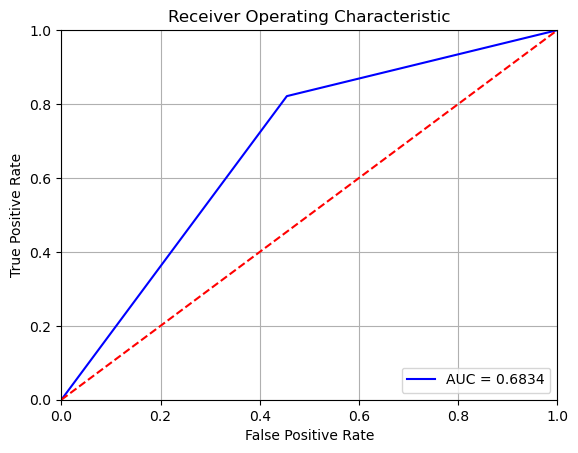

In [99]:
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

Зная, что изначально дисбаланса целевого класса у нас не было можем предположить, что модель ведет себя лучше, чем случайный выбор, что и показывает AUC.

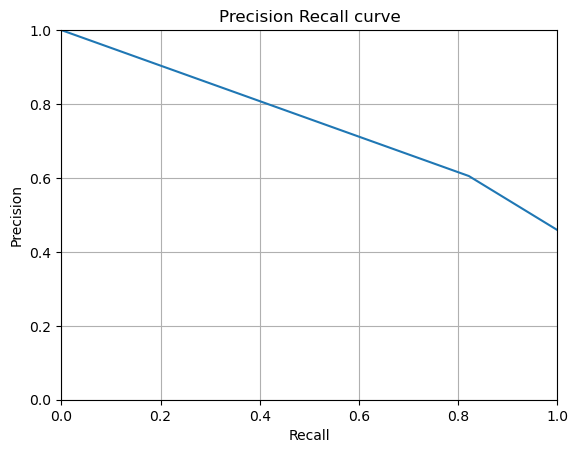

In [100]:
prec, rec, threshold = precision_recall_curve(y_test, preds)

plt.title('Precision Recall curve')
plt.plot(rec, prec)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid()
plt.show()

### **4. Кросс-валидация**
Добавим кросс-валидацию для улучшения точности модели.

In [101]:
#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(1,100,11), dtype = "int"),}

#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [102]:
#fuction to display plot
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

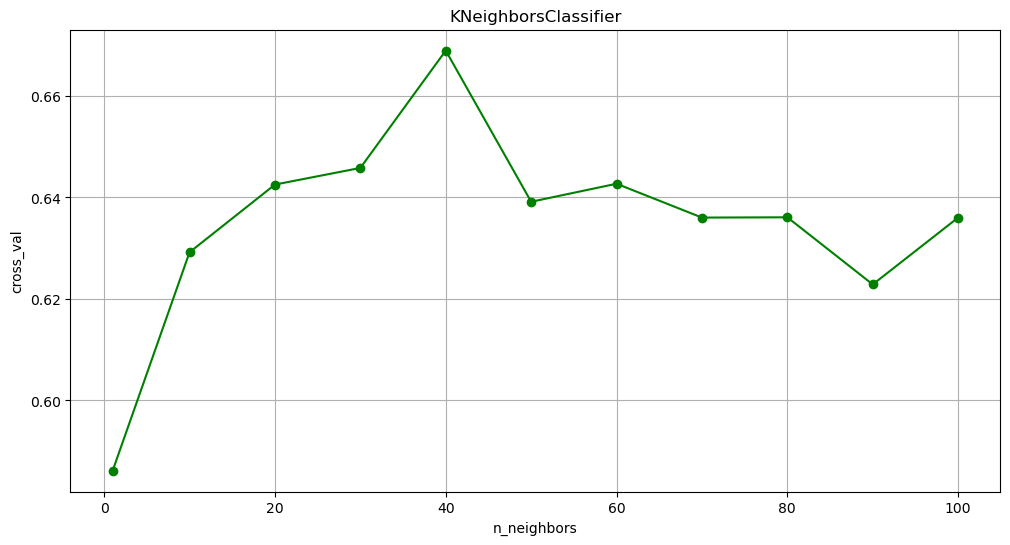

In [103]:
#plot itself
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Обращаем внимание, что пик значения приходится на 40 ближайших соседей, что при размере выборки в 300 является достаточно большим значением.

Узнаем более точные значение лучшего параметра сузив сетку.

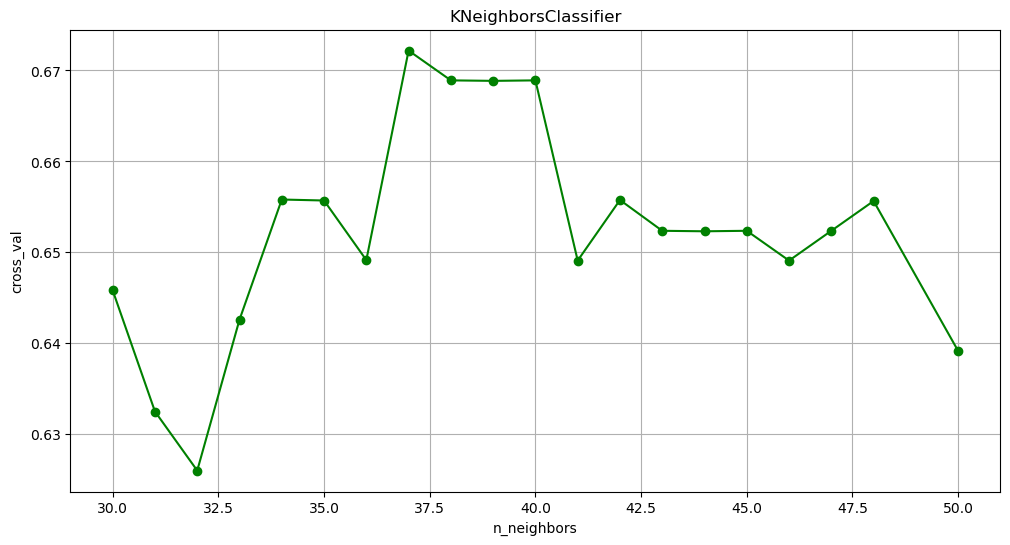

In [104]:
#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(30,50,20), dtype = "int"),}

#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X,y)

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [105]:
gs.best_params_

{'n_neighbors': 37}

Лучшее значение по кросс-валидации - 37, однако качество модели все еще низкое.

Проведем нормализацию и оценим влияние на результат

### **5. Нормализация**

In [106]:
from sklearn.preprocessing import scale

In [107]:
X_scaled = scale(np.array(X, dtype = "float"), with_std=True, with_mean=True)

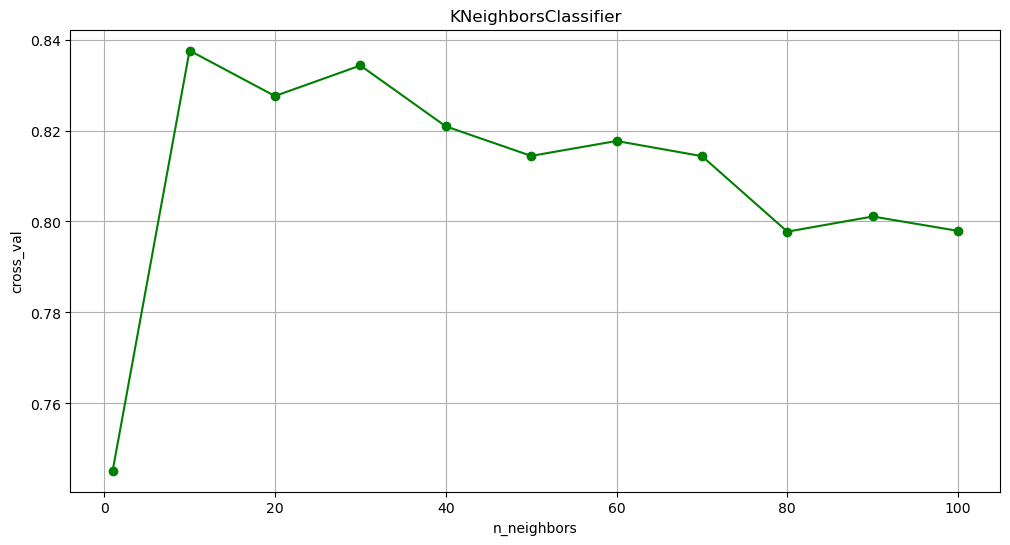

In [108]:
#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(1,100,11), dtype = "int"),}

#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X_scaled,y)

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

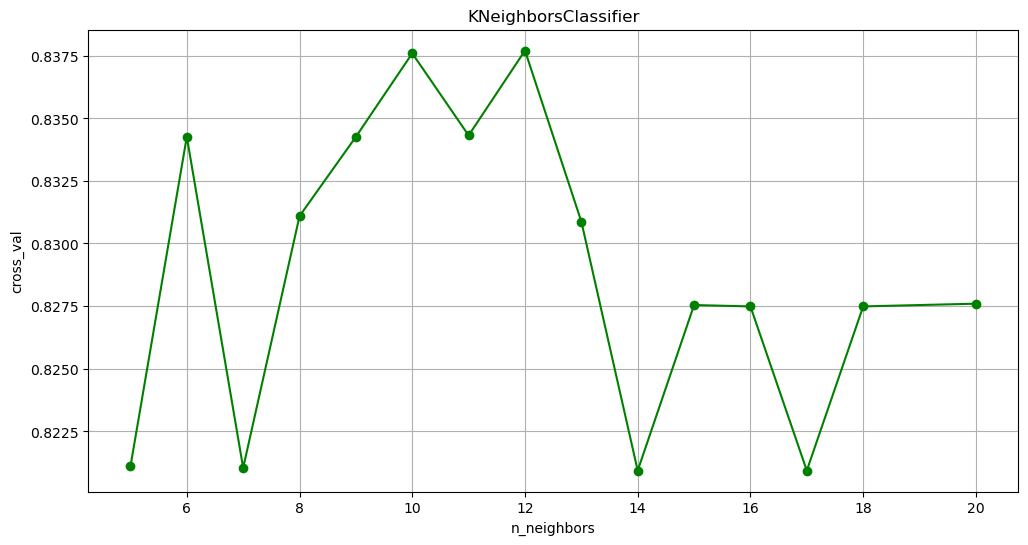

In [109]:
#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(5,20,15), dtype = "int"),}

#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X_scaled,y)

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

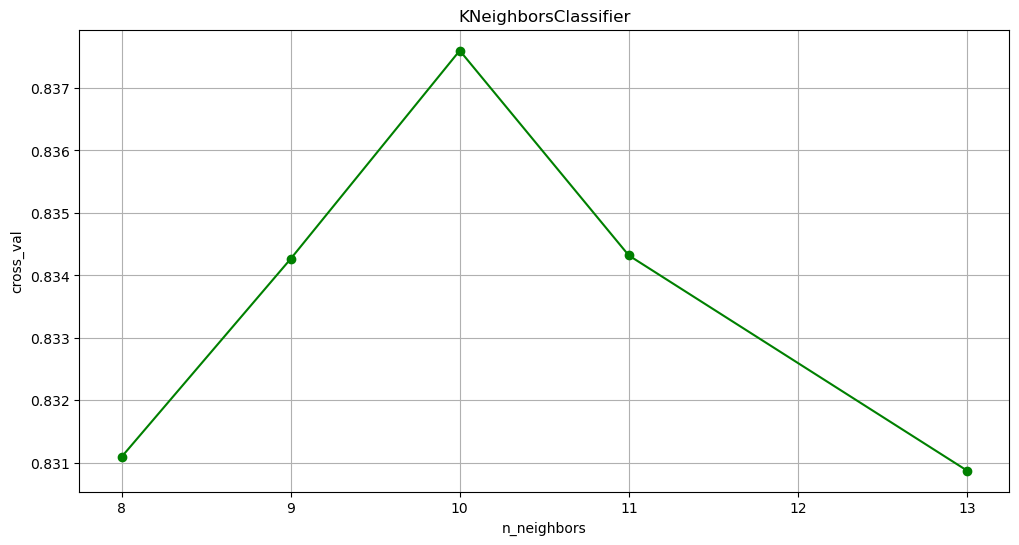

In [110]:
#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(8,13,5), dtype = "int"),}

#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X_scaled,y)

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [111]:
gs.best_params_

{'n_neighbors': 10}

Как можно заметить качество модели сильно возрасло после нормализации, соответственно в дальнейшем будем использовать нормализованные данные

Определим метрики модели после уточнения параметра кросс-валидацией и нормализации данных

In [112]:
knn_n = KNeighborsClassifier(n_neighbors = 10)

In [113]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_scaled, y, test_size = 0.2)

In [114]:
knn_n.fit(X_train_n, y_train_n)

preds_n = knn_n.predict(X_test_n)

Выведем основные метрики, а также построим графики ROC AUC и Precision Recall

In [115]:
print("Accuracy score is ", accuracy_score(y_test_n, preds_n), "\n"
      "f1 score is ", f1_score(y_test_n, preds_n)
     )

Accuracy score is  0.8688524590163934 
f1 score is  0.8787878787878789


In [116]:
#без кросс-валидации и нормализации
print("Accuracy score is ", accuracy_score(y_test, preds), "\n"
      "f1 score is ", f1_score(y_test, preds)
     )

Accuracy score is  0.6721311475409836 
f1 score is  0.6969696969696969


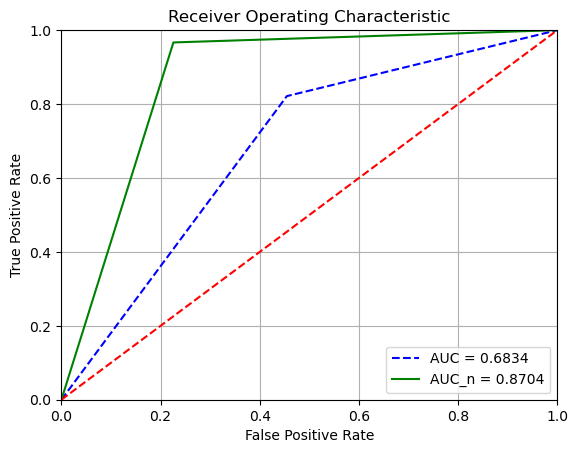

In [117]:
#без кросс-валидации и нормализации
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b--', label = 'AUC = %0.4f' % roc_auc)


#с кросс-валидацией и нормализацией
fpr_n, tpr_n, threshold_n = roc_curve(y_test_n, preds_n)

roc_auc_n = auc(fpr_n, tpr_n)

plt.plot(fpr_n, tpr_n, 'g', label = 'AUC_n = %0.4f' % roc_auc_n)


plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

AUC ощутимо возрастает после проведения кросс-валидации и нормализации данных

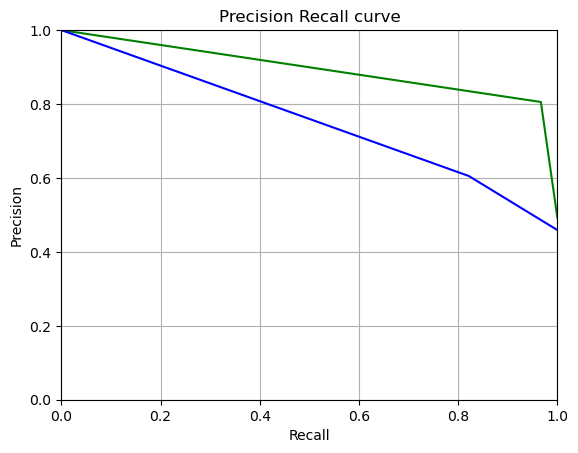

In [118]:
#с кросс-валидацией и нормализацией
prec_n, rec_n, threshold_n = precision_recall_curve(y_test_n, preds_n)
plt.plot(rec_n, prec_n, "g")

#без кросс-валидации и нормализации
prec, rec, threshold = precision_recall_curve(y_test, preds)
plt.plot(rec, prec, "b")


plt.title('Precision Recall curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.grid()
plt.show()

### **6. OneHot Encoding**

Теперь рассмотрим закодированные данные:

Проведем подбор параметров по Grid Search, добавив метрику расстояния

In [119]:
X_enc_scaled = scale(np.array(X_enc, dtype = "float"), with_std=True, with_mean=True)

In [120]:
#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(5,35,30), dtype = "int"), 'metric': ('minkowski', 'euclidean', 'cityblock')}
#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X_enc_scaled, y_enc)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ('minkowski', 'euclidean', 'cityblock'),
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35])})

In [121]:
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 24}

Далее рассчитаем метрики для закодированных One hot Encoding данных с нормализацией.

In [122]:
knn_e = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski')

X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc_scaled, y_enc, test_size = 0.2)

In [123]:
knn_e.fit(X_enc_train, y_enc_train)

preds_e = knn_e.predict(X_enc_test)

print("Accuracy score is ", accuracy_score(y_enc_test, preds_e), "\n"
      "f1 score is ", f1_score(y_enc_test, preds_e)
     )

Accuracy score is  0.8360655737704918 
f1 score is  0.8484848484848485


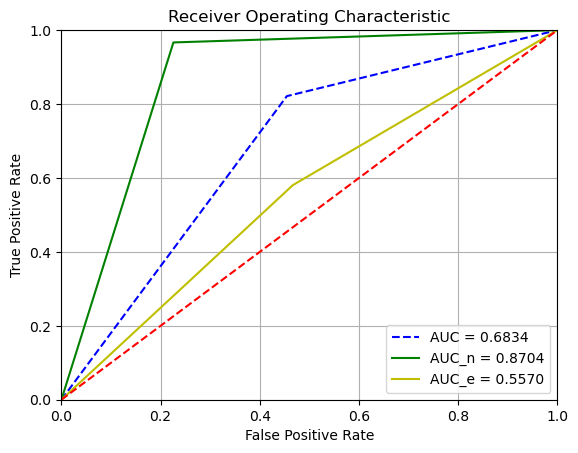

In [134]:
#без кросс-валидации и нормализации
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b--', label = 'AUC = %0.4f' % roc_auc)


#с кросс-валидацией и нормализацией
fpr_n, tpr_n, threshold_n = roc_curve(y_test_n, preds_n)

roc_auc_n = auc(fpr_n, tpr_n)

plt.plot(fpr_n, tpr_n, 'g', label = 'AUC_n = %0.4f' % roc_auc_n)

#с кросс-валидацией, нормализацией one-hot encoding
fpr_e, tpr_e, threshold_e = roc_curve(y_enc_test, preds_e)

roc_auc_e = auc(fpr_e, tpr_e)

plt.plot(fpr_e, tpr_e, 'y', label = 'AUC_e = %0.4f' % roc_auc_e)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

Вывод по основному заданию: наиболее хорошие результаты (по метрикам AUC, f1, accuracy) показывают нормализованные данные, перекодированные one-hot encoding.

### **7. OPTUNA**

Попробуем подобрать гиперпараметры KNN и тип нормализации с помощью библиотеки OPTUNA

In [125]:
%pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/69/60/87a06ef66b34cbe2f2eb0ab66f003664404a7f40c21403a69fad7e28a82b/optuna-3.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/a2/8b/46919127496036c8e990b2b236454a0d8655fd46e1df2fd35610a9cbc842/alembic-1.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for cmaes>=0.10.0 from https://files.pythonhosted.org/packages/f7/46/7d9544d453346f6c0c405916c95fdb653491ea2e9976cabb810ba2fe8cd4/cmaes-0.10.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 194.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 236.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 299.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [135]:
import optuna
from optuna.samplers import TPESampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [136]:
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc, y_enc, test_size = 0.2)

In [141]:
def objective(trial):

    #define scalers for data

    scalers = trial.suggest_categorical("scalers", ["MinMaxScaler","StandardScaler","RobustScaler"])

    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    else:
        scaler = RobustScaler()

    #Tune estimator algorithm
    n_neighbors = trial.suggest_int("n_neighbors", 5, 35, log = True)
    metric = trial.suggest_categorical("metric", ["euclidean",  "minkowski", "cityblock" ] )
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, metric = metric)

    pipeline = make_pipeline(scaler, knn)

    score = cross_val_score(pipeline, X_enc_train, y_enc_train, scoring = "accuracy")
    accuracy = score.mean()

    return accuracy

study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 500)
study.best_params

[I 2023-10-07 15:07:39,136] A new study created in memory with name: no-name-9eb977a9-c6a5-4487-a876-f1a53716f17c
[I 2023-10-07 15:07:39,243] Trial 0 finished with value: 0.8506802721088436 and parameters: {'scalers': 'RobustScaler', 'n_neighbors': 6, 'metric': 'cityblock'}. Best is trial 0 with value: 0.8506802721088436.
[I 2023-10-07 15:07:39,397] Trial 1 finished with value: 0.805017006802721 and parameters: {'scalers': 'StandardScaler', 'n_neighbors': 7, 'metric': 'minkowski'}. Best is trial 0 with value: 0.8506802721088436.
[I 2023-10-07 15:07:39,552] Trial 2 finished with value: 0.8215986394557824 and parameters: {'scalers': 'RobustScaler', 'n_neighbors': 8, 'metric': 'minkowski'}. Best is trial 0 with value: 0.8506802721088436.
[I 2023-10-07 15:07:39,706] Trial 3 finished with value: 0.7966836734693878 and parameters: {'scalers': 'RobustScaler', 'n_neighbors': 5, 'metric': 'euclidean'}. Best is trial 0 with value: 0.8506802721088436.
[I 2023-10-07 15:07:39,885] Trial 4 finished 

{'scalers': 'MinMaxScaler', 'n_neighbors': 19, 'metric': 'cityblock'}

In [143]:
study.best_params

{'scalers': 'MinMaxScaler', 'n_neighbors': 19, 'metric': 'cityblock'}

In [144]:
study.best_value

0.883673469387755

Получили близкое по значению количество ближайших соседей, однако метрика расстояний алгоритмом принята другая. В то же время, данный алгоритм подбирал параметры только на обучающей выборке. Проверим gridsearch на той же выборке:

In [145]:
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc_scaled, y_enc, test_size = 0.2)

#grid of parameters
knn_grid = {"n_neighbors" : np.array(np.linspace(5,35,30), dtype = "int"), 'metric': ('minkowski', 'euclidean', 'cityblock')}
#cross-val object
gs = GridSearchCV(knn, knn_grid, cv=5, n_jobs = -1)

#fit
gs.fit(X_enc_test, y_enc_test)

gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 10}

Стоит заметить, что при отсутствии фиксации seed оба алгоритма выдают непостоянные значения, но значения OPTUNA имеют гораздо меньший разброс. Также, с помощью OPTUNA был выбран метод нормализации. Результат при использовании параметров, выбранных OPTUNA выше.

In [152]:
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_enc_scaled, y_enc, test_size = 0.2)

knn_f = KNeighborsClassifier(n_neighbors = 19, metric = 'cityblock')

knn_f.fit(X_f_train, y_f_train)
preds_f = knn_f.predict(X_f_test)

print("Accuracy score is ", accuracy_score(y_f_test, preds_f), "\n"
      "f1 score is ", f1_score(y_f_test, preds_f)
     )

Accuracy score is  0.8852459016393442 
f1 score is  0.9113924050632911


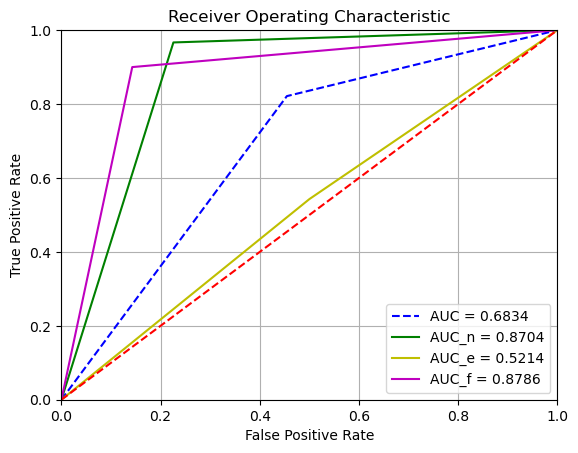

In [153]:
fpr, tpr, threshold = roc_curve(y_test, preds)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b--', label = 'AUC = %0.4f' % roc_auc)


#с кросс-валидацией и нормализацией
fpr_n, tpr_n, threshold_n = roc_curve(y_test_n, preds_n)

roc_auc_n = auc(fpr_n, tpr_n)

plt.plot(fpr_n, tpr_n, 'g', label = 'AUC_n = %0.4f' % roc_auc_n)

#с кросс-валидацией, нормализацией one-hot encoding
fpr_e, tpr_e, threshold_e = roc_curve(y_enc_test, preds_e)

roc_auc_e = auc(fpr_e, tpr_e)

plt.plot(fpr_e, tpr_e, 'y', label = 'AUC_e = %0.4f' % roc_auc_e)

#с кросс-валидацией, нормализацией one-hot encoding, refined hyperparameters

fpr_f, tpr_f, threshold_f = roc_curve(y_f_test, preds_f)

roc_auc_f = auc(fpr_f, tpr_f)

plt.plot(fpr_f, tpr_f, 'm', label = 'AUC_f = %0.4f' % roc_auc_f)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

## **Сравнение с другими моделями**